In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Step 1: Load and Prepare the Dataset
data = pd.read_csv('encoded_dataset.csv')  # Replace with your file path
X = data.drop(columns=["Broad_Class_Encoded"])  # Features
y = data["Broad_Class_Encoded"]  # Target

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Step 2: Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# Step 3: Train the SVM Model
svm_model = SVC(kernel='linear', random_state=42)  # Use 'linear' or 'rbf' kernel
svm_model.fit(X_train, y_train)

# Step 4: Evaluate the Model
y_pred = svm_model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

# Step 5 (Optional): Visualize Results (if applicable)


Accuracy: 0.97

Confusion Matrix:
[[ 86   0   0   0]
 [ 11  75   7   0]
 [  0   0 167   0]
 [  0   0   2 286]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        86
           1       1.00      0.81      0.89        93
           2       0.95      1.00      0.97       167
           3       1.00      0.99      1.00       288

    accuracy                           0.97       634
   macro avg       0.96      0.95      0.95       634
weighted avg       0.97      0.97      0.97       634



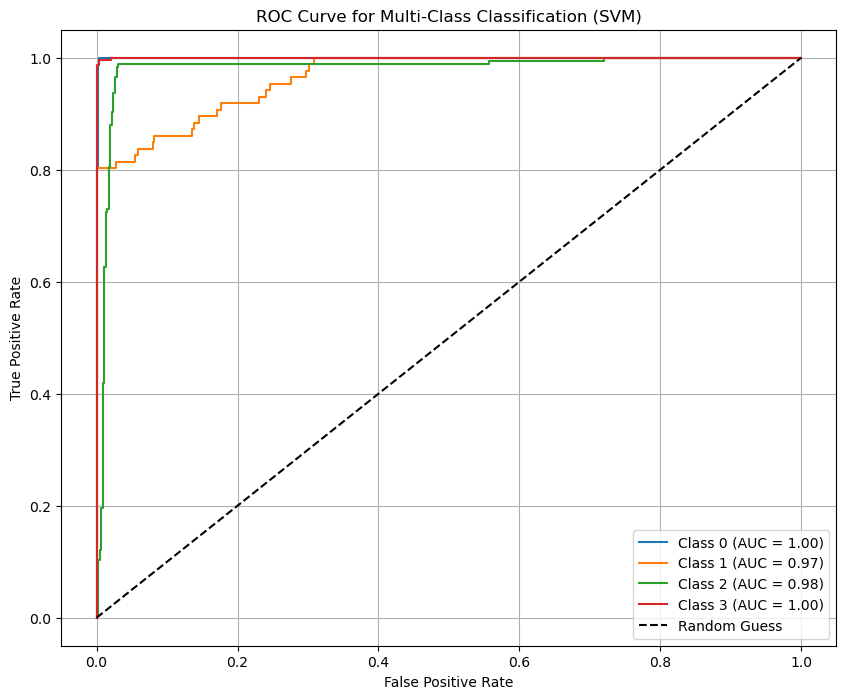

Accuracy of the SVM model: 0.96


In [3]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize, StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Step 1: Load and Prepare the Dataset
data = pd.read_csv('encoded_dataset.csv')  # Replace with your file path
X = data.drop(columns=["Broad_Class_Encoded"])  # Features
y = data["Broad_Class_Encoded"]  # Target variable

# Step 2: Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 3: Normalize the Data (StandardScaler)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Train the SVM Model
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Step 5: Get Predicted Probabilities
y_pred_proba = svm_model.decision_function(X_test)  # Decision function for multi-class

# Step 6: Binarize the Target Labels for ROC Computation
classes = sorted(y.unique())  # Get unique class labels
y_test_binarized = label_binarize(y_test, classes=classes)

# Step 7: Plot the ROC Curve
plt.figure(figsize=(10, 8))
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Adding plot details
plt.title('ROC Curve for Multi-Class Classification (SVM)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Step 8: Print Accuracy (Optional)
accuracy = svm_model.score(X_test, y_test)
print(f"Accuracy of the SVM model: {accuracy:.2f}")


Accuracy: 0.97

Confusion Matrix:
[[ 86   0   0   0]
 [ 11  75   7   0]
 [  0   0 167   0]
 [  0   0   2 286]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        86
           1       1.00      0.81      0.89        93
           2       0.95      1.00      0.97       167
           3       1.00      0.99      1.00       288

    accuracy                           0.97       634
   macro avg       0.96      0.95      0.95       634
weighted avg       0.97      0.97      0.97       634



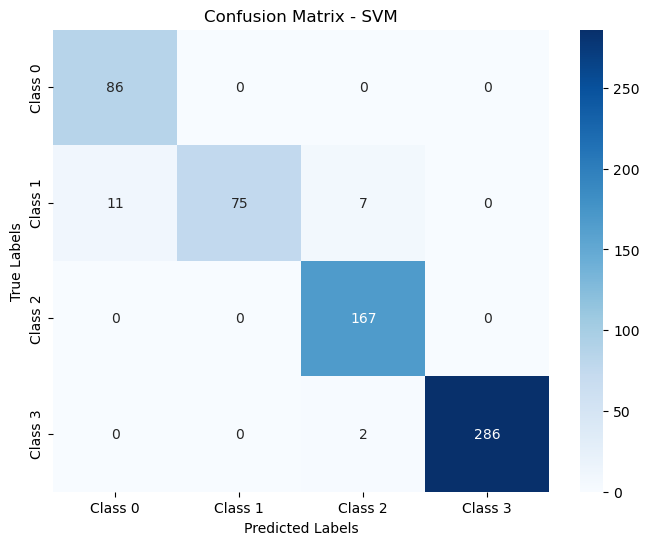

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Step 1: Load and Prepare the Dataset
data = pd.read_csv('encoded_dataset.csv')  # Replace with your file path
X = data.drop(columns=["Broad_Class_Encoded"])  # Features
y = data["Broad_Class_Encoded"]  # Target

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Step 2: Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# Step 3: Train the SVM Model
svm_model = SVC(kernel='linear', random_state=42)  # Use 'linear' or 'rbf' kernel
svm_model.fit(X_train, y_train)

# Step 4: Evaluate the Model
y_pred = svm_model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

# Step 5: Visualize the Confusion Matrix using a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1", "Class 2", "Class 3"], yticklabels=["Class 0", "Class 1", "Class 2", "Class 3"])
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
